In [1]:
import requests 


url = 'http://api.opendatanetwork.com/data/v1/values?variable=economy.cost_of_living.index&entity_id=0400000US37&app_token=pZkfBdEiZbI2gLPXFZoMFw90c'



In [2]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [3]:
cog_all = []
cog_goods = []
cog_other = []
cog_rent = []

In [4]:
for year in years:
    response = requests.get(url +"&year=" + str(year)).json()
    cog_all.append(response['data'][1])
    cog_goods.append(response['data'][2])
    cog_other.append(response['data'][3])
    cog_rent.append(response['data'][4])

#response   
#cog_all

In [6]:
#dont run
goods = []


for good in cog_goods:
    goods.append(good[1])

goods

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [5]:
goodsLC = [good[1] for good in cog_goods]
goodsLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [6]:
allLC = [item[1] for item in cog_all]
allLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [7]:
otherLC = [other[1] for other in cog_other]
otherLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [8]:
rentLC = [rent[1] for rent in cog_rent]
rentLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [9]:
cost_of_living_dict = {
    "Year": years,
    "North Carolina": allLC
}
cost_of_living_dict

{'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
 'North Carolina': [92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]}

In [10]:
import pandas as pd

In [11]:
cost_of_living = pd.DataFrame(cost_of_living_dict)
cost_of_living

,Year,North Carolina
0,2008,92.0
1,2009,92.1
2,2010,91.3
3,2011,91.5
4,2012,91.7
5,2013,91.8
6,2014,91.4
7,2015,91.1
8,2016,90.9


In [12]:
cost_of_living = cost_of_living.set_index("Year")
cost_of_living

,North Carolina
Year,
2008,92.0
2009,92.1
2010,91.3
2011,91.5
2012,91.7
2013,91.8
2014,91.4
2015,91.1
2016,90.9


In [13]:
%matplotlib notebook

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,0,'Years')

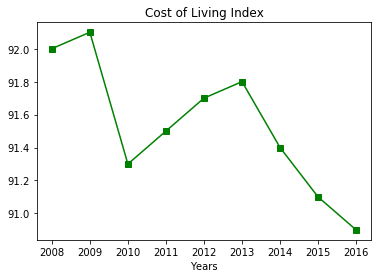

In [22]:
# Create a series for the cost of living 
living = cost_of_living.loc[years,["Cost of Goods"]]

# Plot our line 
plt.plot(years, living, color="green", marker = 's', label="Cost of Living")

# Place a legend on the chart in what matplotlib believes to be the "best" location


plt.title("Cost of Living Index")
plt.xlabel("Years")

# Show the chart
#plt.show()

In [23]:
plt.savefig("Cost of Living_update.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [15]:
Years = [2013, 2014, 2015, 2016]
charlotte = [79.90, 69.99, 75.83, 73.79 ]
united_states = [100, 100, 100, 100]


In [16]:
charlotte_cost = {"Year": Years,
                  "Charlotte": charlotte,
                  "United States": united_states}


In [17]:
cost_of_living_us = pd.DataFrame(charlotte_cost)

In [33]:
merge_table = pd.merge(cost_of_living, cost_of_living_us, on="Year")
merge_table

merge_table.set_index('Year', inplace = True)
merge_table

,North Carolina,Charlotte,United States
Year,,,
2013,91.8,79.90,100
2014,91.4,69.99,100
2015,91.1,75.83,100
2016,90.9,73.79,100


In [36]:
merge_df = merge_table[['Charlotte', 'North Carolina', 'United States']]
merge_df

,Charlotte,North Carolina,United States
Year,,,
2013,79.90,91.8,100
2014,69.99,91.4,100
2015,75.83,91.1,100
2016,73.79,90.9,100


<IPython.core.display.Javascript object>


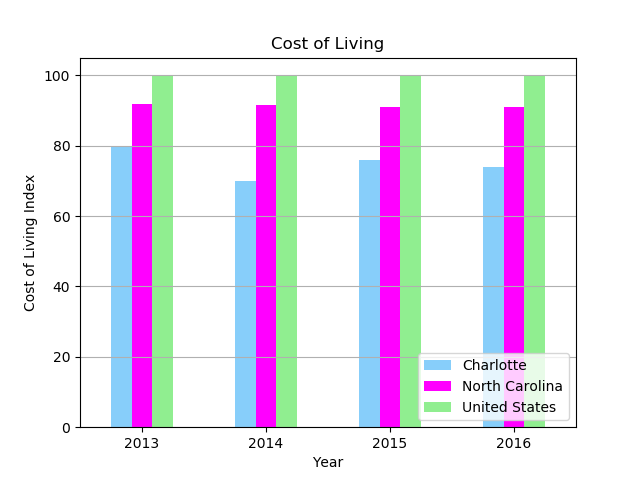

In [48]:
# charlotte = [79.90, 69.99, 75.83, 73.79]
# north_carolina = [91.8, 91.4, 91.1. 90.9]
# united_states = [100, 100, 100, 100]
color = ['lightskyblue', 'magenta', 'lightgreen']
ax = merge_df.plot.bar(rot=0, color=color)

plt.title("Cost of Living")
plt.xlabel("Year")
plt.ylabel("Cost of Living Index")
plt.legend(loc="lower right")
plt.gca().yaxis.grid(True)

In [49]:
plt.savefig("Cost_of_Living_updated.png")
plt.show()